**Install The required packages**

In [2]:
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [14]:
# Install necessary packages
!pip install scipy
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *

from collections import Counter

# Load data using the full path from Google Drive
data_path = '/content/drive/MyDrive/Colab Notebooks (Ransom)/241-CoE540-551-Project_Dynamic_Analysis_Dataset1.ipynb'
# Assuming the file is a CSV, you would use pd.read_csv to load it:
# df = pd.read_csv(data_path)
# Adjust the reading method if it's not a CSV file.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the Dataset that is in CSV format**

In [15]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks (Ransom)/sensors-2047104-supplementary.csv",sep=',')
df.head()

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,positives,families,description,sign_name,sign_stacktrace,arguments,api,category,imported_dll_count,dll,pe_res_name,filetype,pe_sec_name,entropy,hosts,requests,mitm,domains,dns_servers,tcp,udp,dead_hosts,proc,beh_command_line,process_path,tree_command_line,children,tree_process_name,command_line,regkey_read,directory_enumerated,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
0,E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,6.0,6.0,20.0,19.0,0.0,18.0,2.0,35.0,28.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,0.0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,1.0,4073.0
1,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,4.0,0.0,4.0,1.0,2.0,14.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,19.0
2,E,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,6.0,2.0,2.0,4.0,4.0,14.0,14.0,0.0,13.0,2.0,26.0,22.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,17.0
3,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,10.0,0.0,5.0,5.0,5.0,1.0,3.0,0.0,0.0,5.0,5.0,21.0,18.0,0.0,17.0,2.0,38.0,29.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,66.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,28.0,0.0,1.0,18.0
4,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,6.0,0.0,2.0,2.0,2.0,1.0,6.0,31.0,31.0,3.0,3.0,5.0,6.0,0.0,5.0,1.0,4.0,23.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,11.0,0.0,27.0,0.0,0.0,6.0,0.0,0.0,33.0,0.0,1.0,18.0


**Label The Target column family is 1 if it is G and 0 if it is E or L**

In [5]:
# prompt: replace the value of column family is 1 if it is G and 0 if it is E or L

# Assuming 'family' is the column name you want to modify
df['family'] = df['family'].apply(lambda x: 1 if x == 'G' else 0)

**Dataset Exploration**

In [6]:
# Total records
print(df.shape[0])

df.describe()

2001


,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,positives,families,description,sign_name,sign_stacktrace,arguments,api,category,imported_dll_count,dll,pe_res_name,filetype,pe_sec_name,entropy,hosts,requests,mitm,domains,dns_servers,tcp,udp,dead_hosts,proc,beh_command_line,process_path,tree_command_line,children,tree_process_name,command_line,regkey_read,directory_enumerated,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
count,2001.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.0,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.499750,0.502500,0.502500,5.210500,0.272000,0.272000,0.0,0.272000,0.087500,0.087500,0.955000,0.130500,11.794000,11.794000,0.0,38.374000,38.374000,38.374000,1.0,9.475000,10.200000,10.200000,5.05000,5.05000,38.173500,10.231500,0.0,9.57600,1.374500,19.831500,69.194500,0.414500,2.583000,2.583000,2.583000,1.644500,0.535000,1.644500,1.002500,381.984500,110.141500,72.067000,157.701000,0.062500,14.141000,2.246000,332.980500,71.015500,0.004000,0.834000,628.109000
std,0.500125,1.426889,1.426889,34.723206,0.864517,0.864517,0.0,0.864517,0.380679,0.380679,0.207356,0.336937,9.368321,9.368321,0.0,68.542492,68.542492,68.542492,0.0,12.584855,11.690951,11.690951,1.51613,1.51613,170.319699,7.594521,0.0,7.28435,0.529519,23.082797,313.928244,0.992564,3.076173,3.076173,3.076173,0.935178,1.720539,0.935178,2.522236,896.387302,339.542813,185.319757,599.857011,0.283961,21.859759,7.759548,1077.824795,122.958793,0.063135,0.372174,1812.565223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,3.00000,3.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,5.000000,0.0,0.000000,0.000000,0.000000,1.0,4.000000,1.000000,1.000000,4.00000,4.00000,4.000000,4.000000,0.0,4.00000,1.000000,3.000000,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,17.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,8.000000,0.0,3.000000,3.000000,3.000000,1.0,7.000000,5.500000,5.500000,5.00000,5.00000,8.000000,8.000000,0.0,7.00000,1.000000,7.000000,22.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,23.000000,0.000000,1.000000,22.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,17.000000,17.000000,0.0,53.000000,53.000000,53.000000,1.0,10.000000,12.500000,12.500000,6.00000,6.00000,20.000000,17.000000,0.0,16.00000,2.000000,35.000000,29.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,95.000000,10.000000,27.000000,10.000000,0.000000,20.000000,1.000000,9.000000,72.250000,0.000000,1.000000,39.000000
max,1.000000,20.000000,20.000000,392.000000,6.000000,6.000000,0.0,6.000000,4.000000,4.000000,1.000000,1.000000,52.000000,52.000000,0.0,411.000000,411.000000,411.000000,1.0,82.000000,47.000000,

**Null Value Check and Remove that**

In [7]:
# prompt: check the null value and remove that

# Null Value Check
print(df.isnull().sum())

# Remove rows with null values
df.dropna(inplace=True)

# Verify that null values have been removed
print(df.isnull().sum())

family                  0
proc_pid                1
file                    1
urls                    1
type                    1
name                    1
ext_urls                1
path                    1
program                 1
info                    1
positives               1
families                1
description             1
sign_name               1
sign_stacktrace         1
arguments               1
api                     1
category                1
imported_dll_count      1
dll                     1
pe_res_name             1
filetype                1
pe_sec_name             1
entropy                 1
hosts                   1
requests                1
mitm                    1
domains                 1
dns_servers             1
tcp                     1
udp                     1
dead_hosts              1
proc                    1
beh_command_line        1
process_path            1
tree_command_line       1
children                1
tree_process_name       1
command_line

**Show the Distribution of Labelled Data**

In [8]:
df.family.value_counts() #1 means Goodware, 0 means Ransomware

,count
family,
0,1000
1,1000


**Find the data type**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   family                2000 non-null   int64  
 1   proc_pid              2000 non-null   float64
 2   file                  2000 non-null   float64
 3   urls                  2000 non-null   float64
 4   type                  2000 non-null   float64
 5   name                  2000 non-null   float64
 6   ext_urls              2000 non-null   float64
 7   path                  2000 non-null   float64
 8   program               2000 non-null   float64
 9   info                  2000 non-null   float64
 10  positives             2000 non-null   float64
 11  families              2000 non-null   float64
 12  description           2000 non-null   float64
 13  sign_name             2000 non-null   float64
 14  sign_stacktrace       2000 non-null   float64
 15  arguments             2000

**Visualize the Distribution using pie Chart**

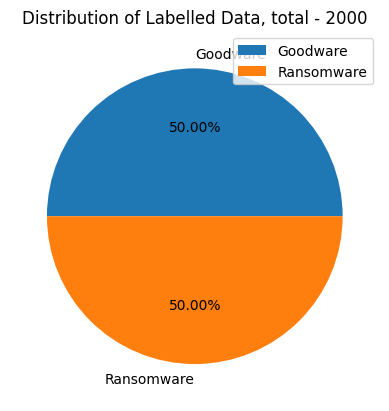

In [10]:
plt.pie(df.family.value_counts().values.tolist(), labels=['Goodware','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.title(f"Distribution of Labelled Data, total - {len(df)}")
plt.show()

**Unique rows(Files/Objects (MD5))**

In [11]:
df.head()

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,positives,families,description,sign_name,sign_stacktrace,arguments,api,category,imported_dll_count,dll,pe_res_name,filetype,pe_sec_name,entropy,hosts,requests,mitm,domains,dns_servers,tcp,udp,dead_hosts,proc,beh_command_line,process_path,tree_command_line,children,tree_process_name,command_line,regkey_read,directory_enumerated,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,6.0,6.0,20.0,19.0,0.0,18.0,2.0,35.0,28.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,0.0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,1.0,4073.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,4.0,0.0,4.0,1.0,2.0,14.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,19.0
2,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,6.0,2.0,2.0,4.0,4.0,14.0,14.0,0.0,13.0,2.0,26.0,22.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,17.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,10.0,0.0,5.0,5.0,5.0,1.0,3.0,0.0,0.0,5.0,5.0,21.0,18.0,0.0,17.0,2.0,38.0,29.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,66.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,28.0,0.0,1.0,18.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,6.0,0.0,2.0,2.0,2.0,1.0,6.0,31.0,31.0,3.0,3.0,5.0,6.0,0.0,5.0,1.0,4.0,23.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,11.0,0.0,27.0,0.0,0.0,6.0,0.0,0.0,33.0,0.0,1.0,18.0


**Feature Selection Mechanism**

**Show the Highly Coorelated features through Pearson Correlation Matrix**

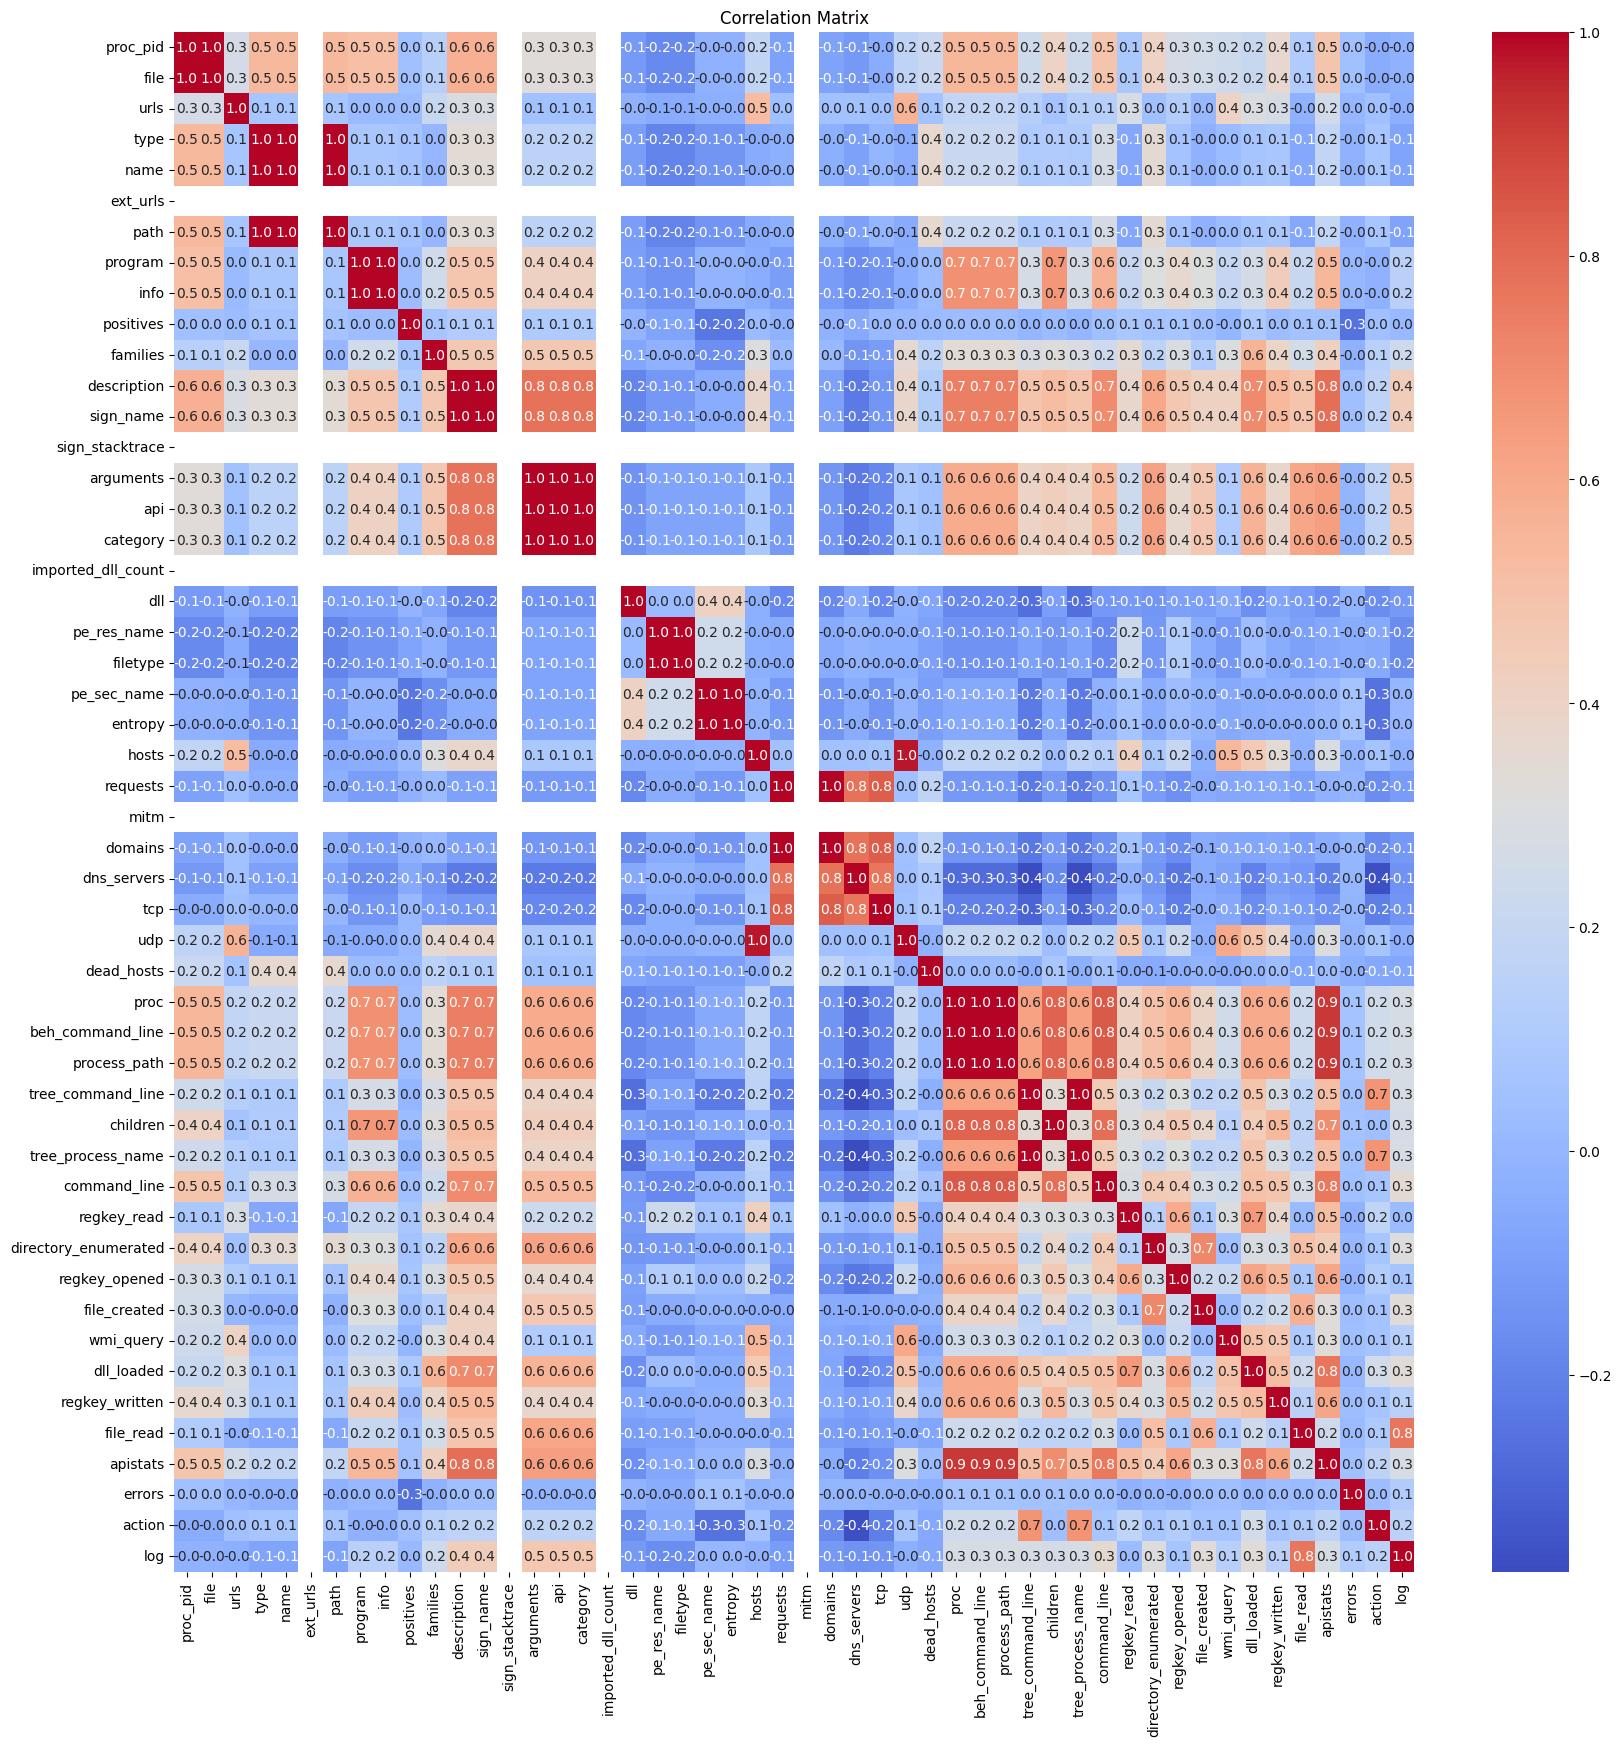

In [12]:
# Correlation matrix with values
corr_matrix = df.drop(['family'], axis=1).corr()
plt.figure(figsize=(20, 20))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

**Find highly correlated features (SET threshold 0.95)**

In [13]:
# Create correlation matrix
corr_matrix = df.drop(['family'], axis=1).corr().abs() # Includes negative correlation as well

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['file', 'name', 'path', 'info', 'sign_name', 'api', 'category', 'filetype', 'entropy', 'domains', 'udp', 'beh_command_line', 'process_path', 'tree_process_name']


**Now drop these highly correlated features and show the correlation Matrix**

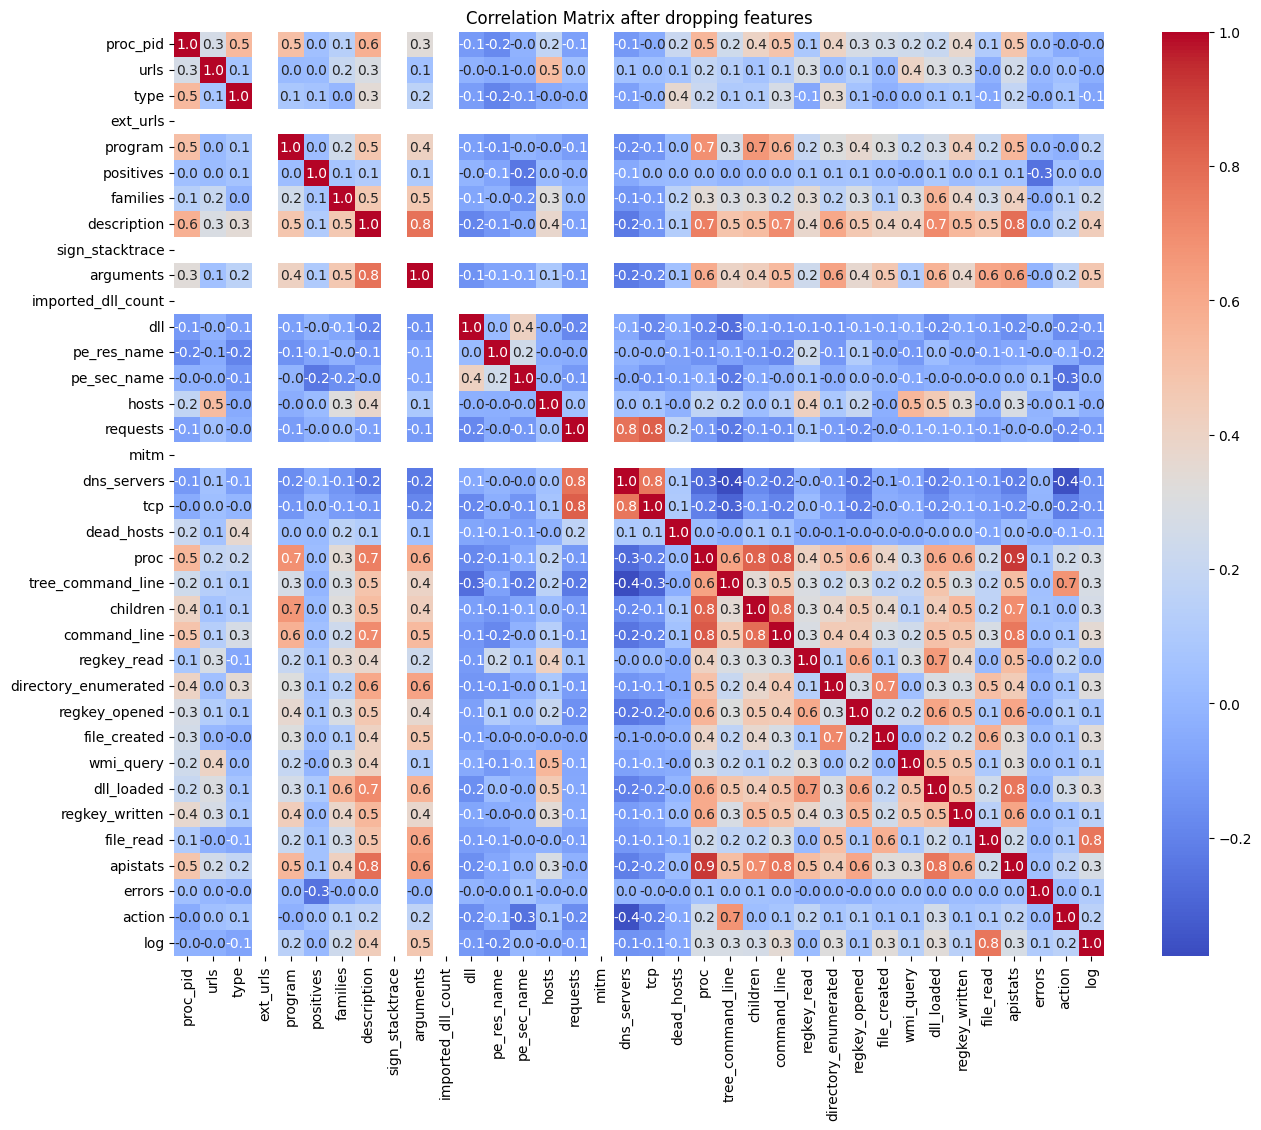

In [ ]:
# prompt: after these dropped features show the present correlation matrix
df.drop(to_drop, axis=1, inplace=True)
# Correlation matrix after dropping features
corr_matrix = df.drop(['family'], axis=1).corr()
plt.figure(figsize=(15, 12))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix after dropping features')
plt.show()

**Most Relevant Features for Prediction using Information Value (IV) and Weight of Evidence (WoE)**

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
df.family.dtypes

dtype('int64')

In [ ]:
# Get the list of columns to drop
cols_to_drop = to_drop
 #['file', 'name', 'path', 'info', 'sign_name', 'api', 'category', 'filetype', 'entropy', 'domains', 'udp', 'beh_command_line', 'process_path', 'tree_process_name']

# Keep only the columns that are in the DataFrame
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Now drop the columns that are present
iv, woe = iv_woe(df.drop(cols_to_drop, axis=1), 'family')

Information value of proc_pid is 0.92878
Information value of urls is 0.368884
Information value of type is 0.58254
Information value of ext_urls is 0.0
Information value of program is 0.759326
Information value of positives is 0.009459
Information value of families is 0.337711
Information value of description is 1.30241
Information value of sign_stacktrace is 0.0
Information value of arguments is 1.721756
Information value of imported_dll_count is 0.0
Information value of dll is 1.203574
Information value of pe_res_name is 3.877473
Information value of pe_sec_name is 3.431463
Information value of hosts is 0.181521
Information value of requests is 0.186302
Information value of mitm is 0.0
Information value of dns_servers is 0.040559
Information value of tcp is 0.231011
Information value of dead_hosts is 0.131755
Information value of proc is 0.879233
Information value of tree_command_line is 0.709454
Information value of children is 0.155966
Information value of command_line is 0.664269

In [ ]:
iv.sort_values(by = 'IV', ascending=True)

,Variable,IV
0,mitm,0.000000
0,ext_urls,0.000000
0,imported_dll_count,0.000000
0,sign_stacktrace,0.000000
0,positives,0.009459
0,errors,0.011712
0,dns_servers,0.040559
0,dead_hosts,0.131755
0,children,0.155966
0,hosts,0.181521


**Select those Variables whose 0 <IV <1.3 and show the count**

In [ ]:
# Filter for variables with 0 < IV <= 1.3
filtered_iv = iv[(iv['IV'] >0) & (iv['IV'] <1.3)]

# Display the filtered variables and their IV values
print(filtered_iv.sort_values(by = 'IV', ascending=True))
# Show the count of variables meeting the criteria
count = len(filtered_iv)
print("\nNumber of variables with 0 < IV < 1.3:", count)

# Display the sorted DataFrame
filtered_iv = filtered_iv.sort_values(by = 'IV', ascending=True)['Variable'][:count].values.tolist()
features = filtered_iv

print(features,'\n')
print('Total number of features-\n',len(features))

            Variable        IV
0          positives  0.009459
0             errors  0.011712
0        dns_servers  0.040559
0         dead_hosts  0.131755
0           children  0.155966
0              hosts  0.181521
0           requests  0.186302
0                tcp  0.231011
0             action  0.251283
0      regkey_opened  0.275162
0           families  0.337711
0               urls  0.368884
0          wmi_query  0.502108
0         dll_loaded  0.559147
0               type  0.582540
0       command_line  0.664269
0  tree_command_line  0.709454
0            program  0.759326
0               proc  0.879233
0           proc_pid  0.928780
0        regkey_read  0.957026
0     regkey_written  1.065796
0                dll  1.203574
0           apistats  1.249186
0          file_read  1.292665

Number of variables with 0 < IV < 1.3: 25
['positives', 'errors', 'dns_servers', 'dead_hosts', 'children', 'hosts', 'requests', 'tcp', 'action', 'regkey_opened', 'families', 'urls', 'wmi_query'

**Training Machine Learning Model**

In [ ]:
X = df[features]
y = df['family']

In [ ]:
randomseed = 42 # Used for replicating the experiment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=randomseed)
print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

2000
Training labels shape: (1400,)
Test labels shape: (600,)
Training features shape: (1400, 25)
Test features shape: (600, 25)


In [ ]:
rf = RandomForestClassifier(random_state = randomseed)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:

pred = rf.predict(X_test)
pred_proba = rf.predict_proba(X_test)

# Extract probabilities for the positive class (1)
pred_proba = np.array([prob[1] for prob in pred_proba])

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[287,   1],
       [  1, 311]])

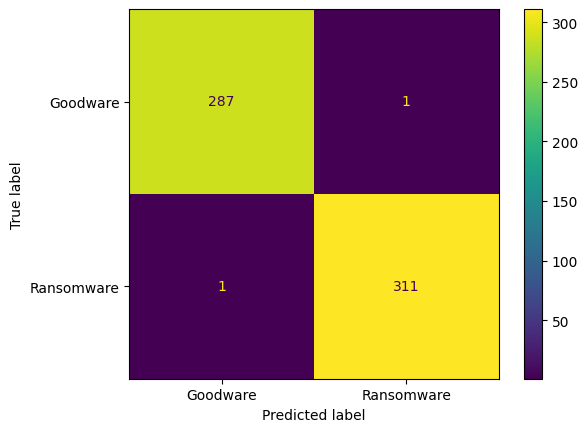

In [ ]:
# Classes
classes = ['Goodware', 'Ransomware']

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

**Accuracy, Precision, recall, F1, FPR calculation**



In [ ]:
# Extract TP, FP, FN, TN
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Printing TP, TN, FP, FN
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")


# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)

# Matthews Correlation Coefficient (MCC)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Calculate AUC score
auc = roc_auc_score(y_test, pred_proba)

# Print all the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print(f"AUC Score: {auc:.4f}")

TP: 311, FP: 1, FN: 1, TN: 287
Accuracy: 0.9967
Precision: 0.9968
Recall: 0.9968
F1 Score: 0.9968
MCC: 0.9933
False Positive Rate: 0.0035
AUC Score: 1.0000


In [ ]:
# prompt: what are the parameters settings used in Random Forest model training. show them

# Accessing Random Forest parameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Now training with XGBoost**

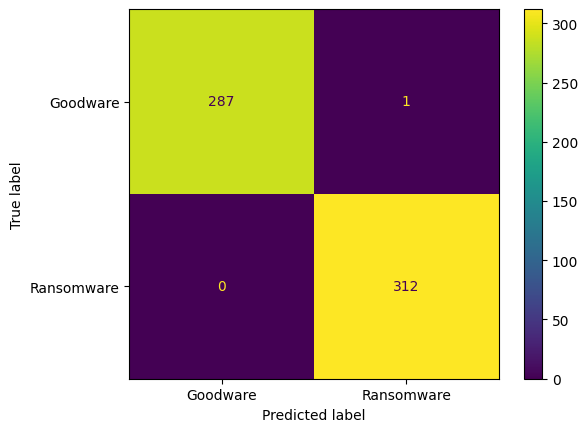

TP: 312, FP: 1, FN: 0, TN: 287
XGBoost Accuracy: 0.9983
XGBoost Precision: 0.9968
XGBoost Recall: 1.0000
XGBoost F1 Score: 0.9984
XGBoost MCC: 0.9967
XGBoost False Positive Rate: 0.0035
XGBoost AUC Score: 1.0000


In [ ]:
# prompt: now train the df with XGBoost

import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=randomseed)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)

# Extract probabilities for the positive class (1)
xgb_pred_proba = np.array([prob[1] for prob in xgb_pred_proba])

# Evaluate the model
# ... (Similar evaluation as for Random Forest, but using xgb_pred and xgb_pred_proba)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)

# Classes
classes = ['Goodware', 'Ransomware']

cmd_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=classes)
cmd_xgb.plot()
plt.show()


# Extract TP, FP, FN, TN
TP_xgb = cm_xgb[1, 1]
FP_xgb = cm_xgb[0, 1]
FN_xgb = cm_xgb[1, 0]
TN_xgb = cm_xgb[0, 0]

# Printing TP, TN, FP, FN
print(f"TP: {TP_xgb}, FP: {FP_xgb}, FN: {FN_xgb}, TN: {TN_xgb}")

# Accuracy
accuracy_xgb = (TP_xgb + TN_xgb) / (TP_xgb + TN_xgb + FP_xgb + FN_xgb)

# Precision
precision_xgb = TP_xgb / (TP_xgb + FP_xgb)

# Recall
recall_xgb = TP_xgb / (TP_xgb + FN_xgb)

# F1 Score
f1_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)

# Matthews Correlation Coefficient (MCC)
mcc_xgb = (TP_xgb * TN_xgb - FP_xgb * FN_xgb) / np.sqrt((TP_xgb + FP_xgb) * (TP_xgb + FN_xgb) * (TN_xgb + FP_xgb) * (TN_xgb + FN_xgb))

# False Positive Rate (FPR)
fpr_xgb = FP_xgb / (FP_xgb + TN_xgb)

# Calculate AUC score
auc_xgb = roc_auc_score(y_test, xgb_pred_proba)

# Print all the metrics
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")
print(f"XGBoost MCC: {mcc_xgb:.4f}")
print(f"XGBoost False Positive Rate: {fpr_xgb:.4f}")
print(f"XGBoost AUC Score: {auc_xgb:.4f}")

# You can further tune the XGBoost model using techniques like grid search or Bayesian optimization.

In [ ]:
# prompt: what are the parameters settings used in XGboost model training

# ... (Your existing code)

# Now training with XGBoost with parameter settings
xgb_model = xgb.XGBClassifier(
    random_state=randomseed,
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1, # Step size shrinkage used in update to prevents overfitting
    max_depth=3,      # Maximum depth of a tree
    subsample=0.8,   # Subsample ratio of the training instances
    colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
    objective='binary:logistic', # Specify the learning task and the corresponding objective function
    eval_metric='logloss' # Evaluation metric for validation data
)

# Train the model
xgb_model.fit(X_train, y_train)

# ... (Rest of your code)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Train the df with Decision Tree**

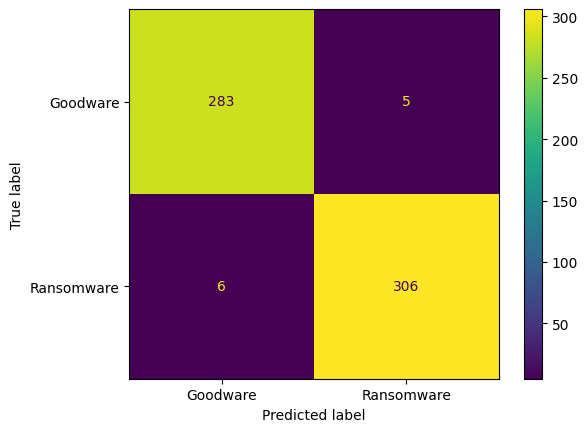

TP: 306, FP: 5, FN: 6, TN: 283
Decision Tree Accuracy: 0.9817
Decision Tree Precision: 0.9839
Decision Tree Recall: 0.9808
Decision Tree F1 Score: 0.9823
Decision Tree MCC: 0.9633
Decision Tree False Positive Rate: 0.0174
Decision Tree AUC Score: 0.9990


In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=42) # Limit tree depth
#dt_model = DecisionTreeClassifier(random_state=randomseed)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)

# Extract probabilities for the positive class (1)
dt_pred_proba = np.array([prob[1] for prob in dt_pred_proba])

# Evaluate the model
# ... (Similar evaluation as for Random Forest, but using dt_pred and dt_pred_proba)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_pred)

# Classes
classes = ['Goodware', 'Ransomware']

cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=classes)
cmd_dt.plot()
plt.show()


# Extract TP, FP, FN, TN
TP_dt = cm_dt[1, 1]
FP_dt = cm_dt[0, 1]
FN_dt = cm_dt[1, 0]
TN_dt = cm_dt[0, 0]

# Printing TP, TN, FP, FN
print(f"TP: {TP_dt}, FP: {FP_dt}, FN: {FN_dt}, TN: {TN_dt}")

# Accuracy
accuracy_dt = (TP_dt + TN_dt) / (TP_dt + TN_dt + FP_dt + FN_dt)

# Precision
precision_dt = TP_dt / (TP_dt + FP_dt)

# Recall
recall_dt = TP_dt / (TP_dt + FN_dt)

# F1 Score
f1_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)

# Matthews Correlation Coefficient (MCC)
mcc_dt = (TP_dt * TN_dt - FP_dt * FN_dt) / np.sqrt((TP_dt + FP_dt) * (TP_dt + FN_dt) * (TN_dt + FP_dt) * (TN_dt + FN_dt))

# False Positive Rate (FPR)
fpr_dt = FP_dt / (FP_dt + TN_dt)

# Calculate AUC score
auc_dt = roc_auc_score(y_test, dt_pred_proba)

# Print all the metrics
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1 Score: {f1_dt:.4f}")
print(f"Decision Tree MCC: {mcc_dt:.4f}")
print(f"Decision Tree False Positive Rate: {fpr_dt:.4f}")
print(f"Decision Tree AUC Score: {auc_dt:.4f}")

In [ ]:
# prompt: at the beginning training score was 1. why it is falling with testing score and how to overcome as raising while testing

# The provided code shows a common issue in machine learning: overfitting.  The model performs very well on the training data (initially high training score) but poorly on unseen data (lower testing score). This means the model has learned the training data too well, including its noise and outliers, and hasn't generalized to the broader patterns.

# Here's how to address overfitting and improve your model's performance on the test set:

# 1. Hyperparameter Tuning:
#    - Random Forest:
#        - `n_estimators`:  Increase the number of trees in the forest.  More trees generally lead to better generalization, but also increase computation time.
#        - `max_depth`: Limit the depth of each tree. Deeper trees are more prone to overfitting.
#        - `min_samples_split`:  Increase the minimum number of samples required to split an internal node.
#        - `min_samples_leaf`: Increase the minimum number of samples required to be at a leaf node.
#        - Try different values and use cross-validation to determine the optimal settings.
#    - XGBoost:
#        - The code already includes some hyperparameters for XGBoost. Explore further tuning with:
#            - `learning_rate`: Lower the learning rate. A smaller learning rate can prevent the model from overfitting too quickly.
#            - `max_depth`:  Limit the depth of each tree.
#            - `subsample` and `colsample_bytree`: Experiment with different values.
#            - `reg_alpha` and `reg_lambda`:  Use regularization to penalize complex models and prevent overfitting.
#    - Decision Tree:
#        - The `max_depth` parameter is crucial for decision trees. Reducing its value will help control complexity.
#        - `min_samples_split` and `min_samples_leaf` can also be adjusted.


# 2. Feature Engineering/Selection:
#    - Examine the importance of features. Remove irrelevant or redundant features.
#    - Create new features that might capture more relevant patterns in the data.  Consider interaction terms.

# 3. Data Augmentation (if applicable):
#    - If you have limited data, increasing the amount of data can help the model generalize better.  This might involve creating synthetic samples or transformations of your existing data.

# 4. Regularization (particularly for XGBoost and linear models):
#    - XGBoost's `reg_alpha` (L1) and `reg_lambda` (L2) parameters already are part of the code. Tune these to find a good balance.


# 5. Cross-Validation:
#    - Use more robust cross-validation techniques like stratified k-fold cross-validation to get a better estimate of the model's performance.


# Example of Hyperparameter tuning with GridSearchCV (Random Forest):

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=randomseed)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # Use more folds for better results
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
pred = best_rf.predict(X_test)
# ... (evaluate the model)


# Apply similar grid search or randomized search for XGBoost and Decision Tree models.


# 6. Ensemble methods:
#    - Combining multiple models often improves prediction accuracy. Use techniques such as bagging (like random forests) or boosting (like XGBoost).

#  After applying these methods, re-evaluate your model's performance on the test set.  You're likely to see better generalization and a reduced gap between the training and testing scores.

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


**Train the model using KNN**

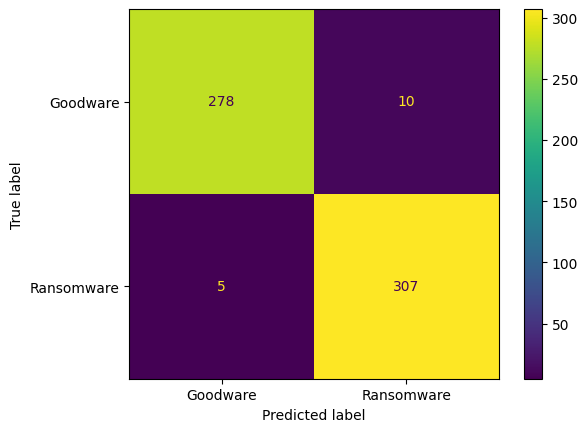

TP: 307, FP: 10, FN: 5, TN: 278
KNN Accuracy: 0.9750
KNN Precision: 0.9685
KNN Recall: 0.9840
KNN F1 Score: 0.9762
KNN MCC: 0.9500
KNN False Positive Rate: 0.0347
KNN AUC Score: 0.9910


In [ ]:
# prompt: train the model using KNN and remove if there any Nan in X_train

from sklearn.neighbors import KNeighborsClassifier

# Remove rows with NaN values in X_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train after dropping NaN rows

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn_model.predict(X_test)
knn_pred_proba = knn_model.predict_proba(X_test)

# Extract probabilities for the positive class (1)
knn_pred_proba = np.array([prob[1] for prob in knn_pred_proba])

# Evaluate the model
# ... (Similar evaluation as for other models, but using knn_pred and knn_pred_proba)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)

# Classes
classes = ['Goodware', 'Ransomware']

cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=classes)
cmd_knn.plot()
plt.show()


# Extract TP, FP, FN, TN
TP_knn = cm_knn[1, 1]
FP_knn = cm_knn[0, 1]
FN_knn = cm_knn[1, 0]
TN_knn = cm_knn[0, 0]

# Printing TP, TN, FP, FN
print(f"TP: {TP_knn}, FP: {FP_knn}, FN: {FN_knn}, TN: {TN_knn}")

# Accuracy
accuracy_knn = (TP_knn + TN_knn) / (TP_knn + TN_knn + FP_knn + FN_knn)

# Precision
precision_knn = TP_knn / (TP_knn + FP_knn)

# Recall
recall_knn = TP_knn / (TP_knn + FN_knn)

# F1 Score
f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

# Matthews Correlation Coefficient (MCC)
mcc_knn = (TP_knn * TN_knn - FP_knn * FN_knn) / np.sqrt((TP_knn + FP_knn) * (TP_knn + FN_knn) * (TN_knn + FP_knn) * (TN_knn + FN_knn))

# False Positive Rate (FPR)
fpr_knn = FP_knn / (FP_knn + TN_knn)

# Calculate AUC score
auc_knn = roc_auc_score(y_test, knn_pred_proba)

# Print all the metrics
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print(f"KNN F1 Score: {f1_knn:.4f}")
print(f"KNN MCC: {mcc_knn:.4f}")
print(f"KNN False Positive Rate: {fpr_knn:.4f}")
print(f"KNN AUC Score: {auc_knn:.4f}")

**Train with Neural Network**

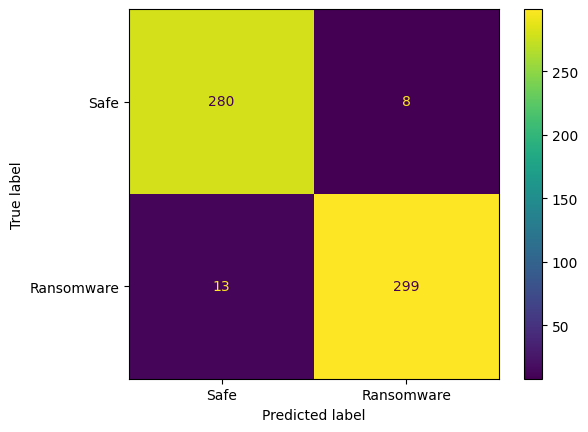

TP: 299, FP: 8, FN: 13, TN: 280
Neural Network Accuracy: 0.9650
Neural Network Precision: 0.9739
Neural Network Recall: 0.9583
Neural Network F1 Score: 0.9661
Neural Network MCC: 0.9301
Neural Network False Positive Rate: 0.0278
Neural Network AUC Score: 0.9971


In [ ]:
# prompt: train the model using Neural Network and remove if there any Nan in X_train also calculate  Accuracy, Precision, Recall, F1 Score, MCC, False Positive Rate, AUC Score

from sklearn.neural_network import MLPClassifier

# Remove rows with NaN values in X_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train after dropping NaN rows

# Create a neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=randomseed)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions on the test set
nn_pred = nn_model.predict(X_test)
nn_pred_proba = nn_model.predict_proba(X_test)

# Extract probabilities for the positive class (1)
nn_pred_proba = np.array([prob[1] for prob in nn_pred_proba])

# Evaluate the model
# ... (Similar evaluation as for other models, but using nn_pred and nn_pred_proba)

# Confusion Matrix
cm_nn = confusion_matrix(y_test, nn_pred)

# Classes
classes = ['Safe', 'Ransomware']

cmd_nn = ConfusionMatrixDisplay(cm_nn, display_labels=classes)
cmd_nn.plot()
plt.show()


# Extract TP, FP, FN, TN
TP_nn = cm_nn[1, 1]
FP_nn = cm_nn[0, 1]
FN_nn = cm_nn[1, 0]
TN_nn = cm_nn[0, 0]

# Printing TP, TN, FP, FN
print(f"TP: {TP_nn}, FP: {FP_nn}, FN: {FN_nn}, TN: {TN_nn}")

# Accuracy
accuracy_nn = (TP_nn + TN_nn) / (TP_nn + TN_nn + FP_nn + FN_nn)

# Precision
precision_nn = TP_nn / (TP_nn + FP_nn)

# Recall
recall_nn = TP_nn / (TP_nn + FN_nn)

# F1 Score
f1_nn = 2 * (precision_nn * recall_nn) / (precision_nn + recall_nn)

# Matthews Correlation Coefficient (MCC)
mcc_nn = (TP_nn * TN_nn - FP_nn * FN_nn) / np.sqrt((TP_nn + FP_nn) * (TP_nn + FN_nn) * (TN_nn + FP_nn) * (TN_nn + FN_nn))

# False Positive Rate (FPR)
fpr_nn = FP_nn / (FP_nn + TN_nn)

# Calculate AUC score
auc_nn = roc_auc_score(y_test, nn_pred_proba)

# Print all the metrics
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")
print(f"Neural Network Precision: {precision_nn:.4f}")
print(f"Neural Network Recall: {recall_nn:.4f}")
print(f"Neural Network F1 Score: {f1_nn:.4f}")
print(f"Neural Network MCC: {mcc_nn:.4f}")
print(f"Neural Network False Positive Rate: {fpr_nn:.4f}")
print(f"Neural Network AUC Score: {auc_nn:.4f}")

**Train the model with SVM**

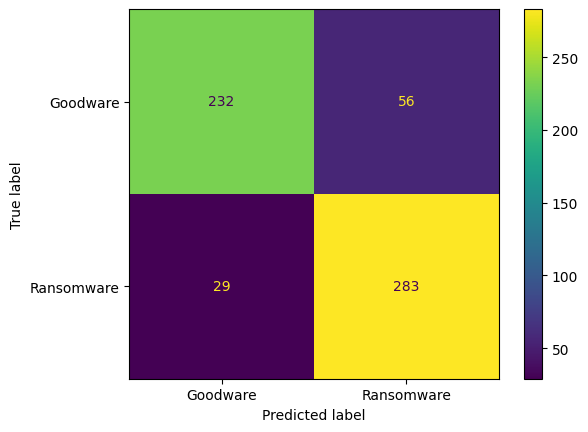

TP: 283, FP: 56, FN: 29, TN: 232
SVM Accuracy: 0.8583
SVM Precision: 0.8348
SVM Recall: 0.9071
SVM F1 Score: 0.8694
SVM MCC: 0.7181
SVM False Positive Rate: 0.1944
SVM AUC Score: 0.9480


In [ ]:
# prompt: train the model with SVM show confusion matrix and print evaluation metrics

from sklearn.svm import SVC

# ... (Your existing code)

# Create an SVM classifier
svm_model = SVC(kernel='linear', probability=True, random_state=randomseed)  # You can change the kernel

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_model.predict(X_test)
svm_pred_proba = svm_model.predict_proba(X_test)

# Extract probabilities for the positive class (1)
svm_pred_proba = np.array([prob[1] for prob in svm_pred_proba])

# Evaluate the model

# Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_pred)

# Classes
classes = ['Goodware', 'Ransomware']

cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=classes)
cmd_svm.plot()
plt.show()

# Extract TP, FP, FN, TN
TP_svm = cm_svm[1, 1]
FP_svm = cm_svm[0, 1]
FN_svm = cm_svm[1, 0]
TN_svm = cm_svm[0, 0]

# Printing TP, TN, FP, FN
print(f"TP: {TP_svm}, FP: {FP_svm}, FN: {FN_svm}, TN: {TN_svm}")

# Accuracy
accuracy_svm = (TP_svm + TN_svm) / (TP_svm + TN_svm + FP_svm + FN_svm)

# Precision
precision_svm = TP_svm / (TP_svm + FP_svm)

# Recall
recall_svm = TP_svm / (TP_svm + FN_svm)

# F1 Score
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)

# Matthews Correlation Coefficient (MCC)
mcc_svm = (TP_svm * TN_svm - FP_svm * FN_svm) / np.sqrt((TP_svm + FP_svm) * (TP_svm + FN_svm) * (TN_svm + FP_svm) * (TN_svm + FN_svm))

# False Positive Rate (FPR)
fpr_svm = FP_svm / (FP_svm + TN_svm)

# Calculate AUC score
auc_svm = roc_auc_score(y_test, svm_pred_proba)

# Print all the metrics
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")
print(f"SVM MCC: {mcc_svm:.4f}")
print(f"SVM False Positive Rate: {fpr_svm:.4f}")
print(f"SVM AUC Score: {auc_svm:.4f}")

In [ ]:
# prompt: train the model with NB show confusion matrix and print evaluation metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb_model.predict(X_test)
nb_pred_proba = nb_model.predict_proba(X_test)

# Extract probabilities for the positive class (1)
nb_pred_proba = np.array([prob[1] for prob in nb_pred_proba])

# Evaluate the model
# Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_pred)

# Classes
classes = ['Goodware', 'Ransomware']

cmd_nb = ConfusionMatrixDisplay(cm_nb, display_labels=classes)
cmd_nb.plot()
plt.show()

# Extract TP, FP, FN, TN
TP_nb = cm_nb[1, 1]
FP_nb = cm_nb[0, 1]
FN_nb = cm_nb[1, 0]
TN_nb = cm_nb[0, 0]

# Accuracy
accuracy_nb = (TP_nb + TN_nb) / (TP_nb + TN_nb + FP_nb + FN_nb)

# Precision
precision_nb = TP_nb / (TP_nb + FP_nb)

# Recall
recall_nb = TP_nb / (TP_nb + FN_nb)

# F1 Score
f1_nb = 2 * (precision_nb * recall_nb) / (precision_nb + recall_nb)

# Matthews Correlation Coefficient (MCC)
mcc_nb = (TP_nb * TN_nb - FP_nb * FN_nb) / np.sqrt((TP_nb + FP_nb) * (TP_nb + FN_nb) * (TN_nb + FP_nb) * (TN_nb + FN_nb))

# False Positive Rate (FPR)
fpr_nb = FP_nb / (FP_nb + TN_nb)

# Calculate AUC score
auc_nb = roc_auc_score(y_test, nb_pred_proba)

# Print all the metrics
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes Precision: {precision_nb:.4f}")
print(f"Naive Bayes Recall: {recall_nb:.4f}")
print(f"Naive Bayes F1 Score: {f1_nb:.4f}")
print(f"Naive Bayes MCC: {mcc_nb:.4f}")
print(f"Naive Bayes False Positive Rate: {fpr_nb:.4f}")
print(f"Naive Bayes AUC Score: {auc_nb:.4f}")